#  Second Price analysis of Vickrey auction

Author: hagino3000  
Date: 2018-08-31

入札金額の分散とセカンドプライスの関係をみる。    
買い手にとって私的価値の高い財が稀な状況を再現するため、私的価値の分布はガンマ分布を仮定する。  
買い手は私的価値の額で入札するとする。

### 結果

私的価値の平均が同じでも分散が大きくなるとセカンドプライスは上昇する

In [2]:
import scipy.stats

## 分布の確認

平均が同じで分散の異なる入札金額分布を作る

In [3]:
dist1 = scipy.stats.gamma(a=2, loc=0, scale=1)
dist2 = scipy.stats.gamma(a=8, loc=0, scale=0.25)

In [4]:
x = np.linspace(0, 15, 1000)
pdf1 = dist1.pdf(x)
pdf2 = dist2.pdf(x)

Text(0.5,1,'実験用の入札金額分布')

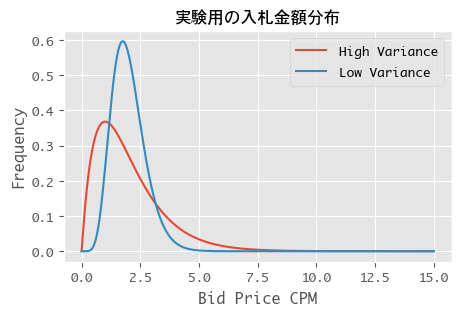

In [5]:
_ = plt.plot(x, pdf1, label='High Variance')
_ = plt.plot(x, pdf2, label='Low Variance')
plt.legend(loc='best')
plt.xlabel('Bid Price CPM')
plt.ylabel('Frequency')
plt.title('実験用の入札金額分布')

In [6]:
values = dist1.rvs(size=5000)
print('分布1: 高分散')
print('Mean:', values.mean())
print('Var:', values.var())


分布1: 高分散
Mean: 2.012657627265381
Var: 1.9901555967748048


In [7]:
values = dist2.rvs(size=5000)
print('分布2；低分散')
print('Mean:', values.mean())
print('Var:', values.var())

分布2；低分散
Mean: 1.9916904876068766
Var: 0.4933056468257914


## 実験

### 入札金額の分散が大きい時

In [8]:
# 分散；高
buyer_num = 20
second_prices1 = []
for _ in range(2000):
    bids = dist1.rvs(size=buyer_num)
    second_prices1.append(bids[np.argsort(bids)[-2]])

Text(0.5,1,'セカンドプライスの分布')

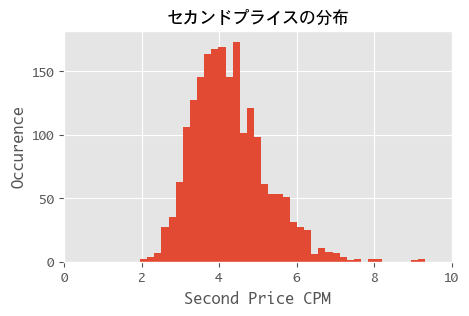

In [9]:
_ = plt.hist(second_prices1, bins=40)
plt.xlim(0, 10)
plt.xlabel('Second Price CPM')
plt.ylabel('Occurence')
plt.title('セカンドプライスの分布')

In [10]:
print('平均', np.mean(second_prices1))

平均 4.272823800879482


### 入札金額の分散が小さい時

In [11]:
# 分散：低
buyer_num = 20
second_prices2 = []
for _ in range(2000):
    bids = dist2.rvs(size=buyer_num)
    second_prices2.append(bids[np.argsort(bids)[-2]])

Text(0.5,1,'セカンドプライスの分布')

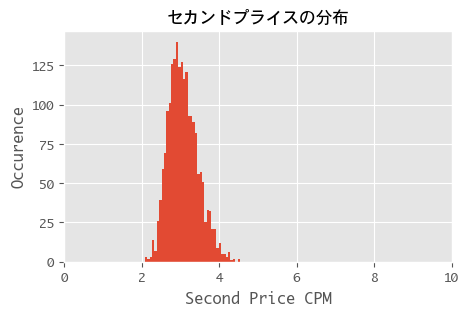

In [12]:
_ = plt.hist(second_prices2, bins=40)
plt.xlim(0, 10)
plt.xlabel('Second Price CPM')
plt.ylabel('Occurence')
plt.title('セカンドプライスの分布')

In [13]:
print('平均', np.mean(second_prices2))

平均 3.074959793134457
